In [1]:
import tensorflow as tf
physicaldevice = tf.config.experimental.list_physical_devices('GPU')
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))
tf.config.experimental.set_memory_growth(physicaldevice[0],True)

Num GPUs Available:  1


In [2]:
import pandas as pd
from tensorflow import keras
from tensorflow.keras import layers
import tensorflow_docs as tfdocs
import tensorflow_docs.plots
import tensorflow_docs.modeling
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

# Read Data from CSV files

In [27]:
datas = pd.read_csv("C:\\Users\\abdul\\Downloads\\house-prices-advanced-regression-techniques\\train.csv")
datas.set_index("Id",inplace=True)

# EDA

In [28]:
from jcopml.plot import plot_missing_value

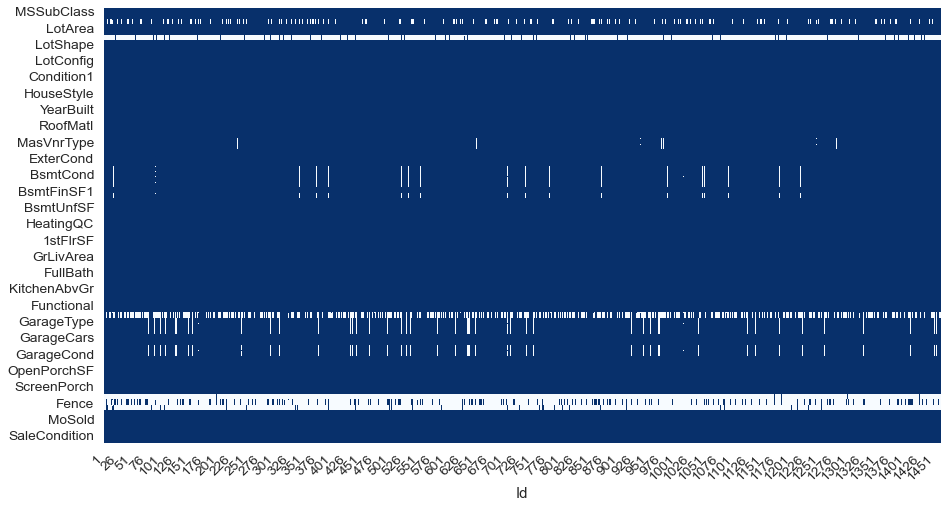

In [29]:
# clean null value
# if null >= 0.4 remove columns
plot_missing_value(datas)

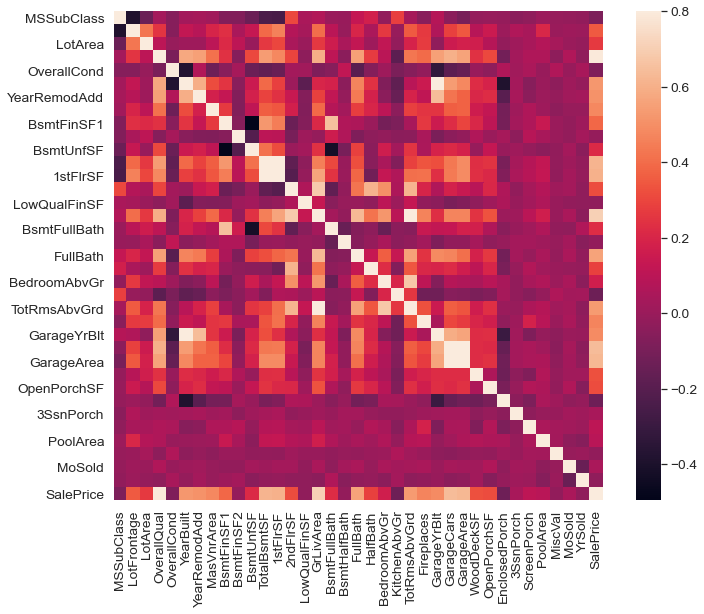

In [30]:
#correlation matrix
corrmat = datas.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);

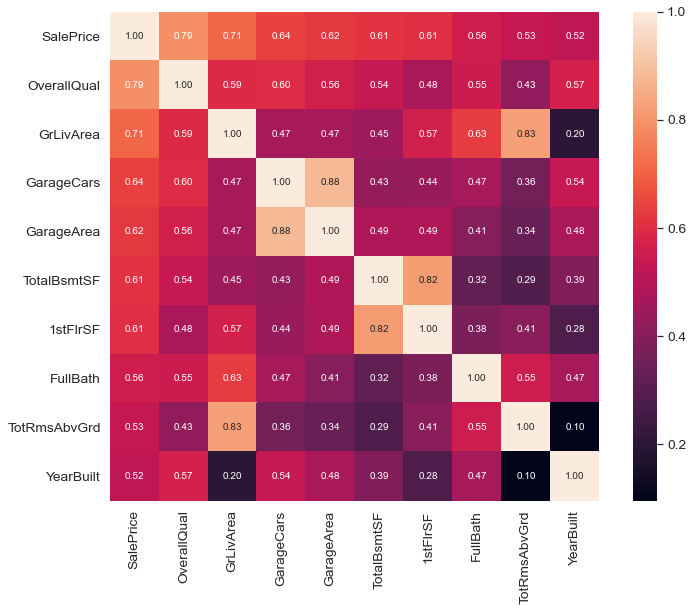

In [31]:
#choose the best variable for train
k = 10 #number of variables for heatmap
cols = corrmat.nlargest(k, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(datas[cols].values.T)
sns.set(font_scale=1.25)
plt.subplots(figsize=(12, 9))
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)


In [32]:
dataset=datas[['OverallQual','GrLivArea','GarageCars','GarageArea','TotalBsmtSF','1stFlrSF','SalePrice']]

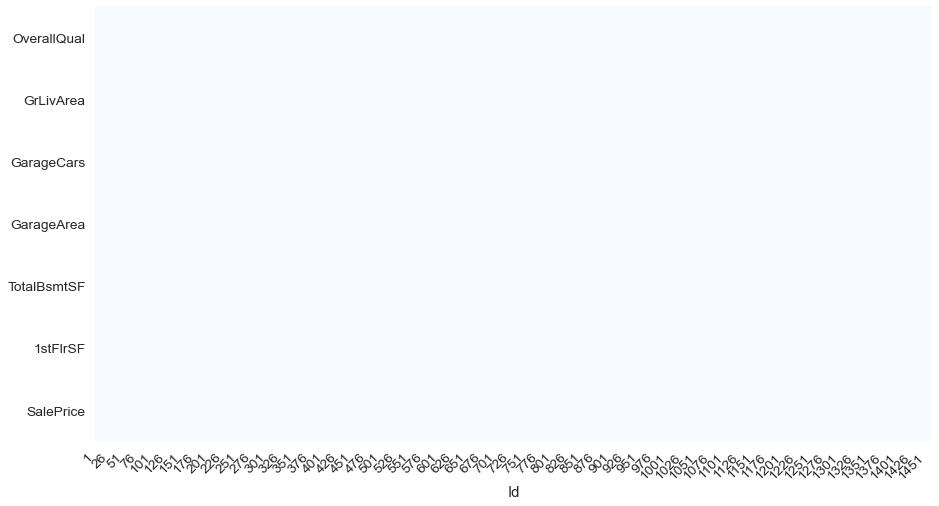

In [33]:
# Looking for null value
plot_missing_value(dataset)

In [34]:
# if the unique count <= 10 it wil be one hot encoding
for col in dataset.columns:
    if len(dataset[col].unique()) <= 10 :
        dataset = pd.concat([dataset,pd.get_dummies(dataset[col], prefix=col)],axis=1)

In [35]:
for col in dataset.columns:
    if len(dataset[col].unique()) > 10 :
        print(col)


GrLivArea
GarageArea
TotalBsmtSF
1stFlrSF
SalePrice


<AxesSubplot:xlabel='1stFlrSF', ylabel='SalePrice'>

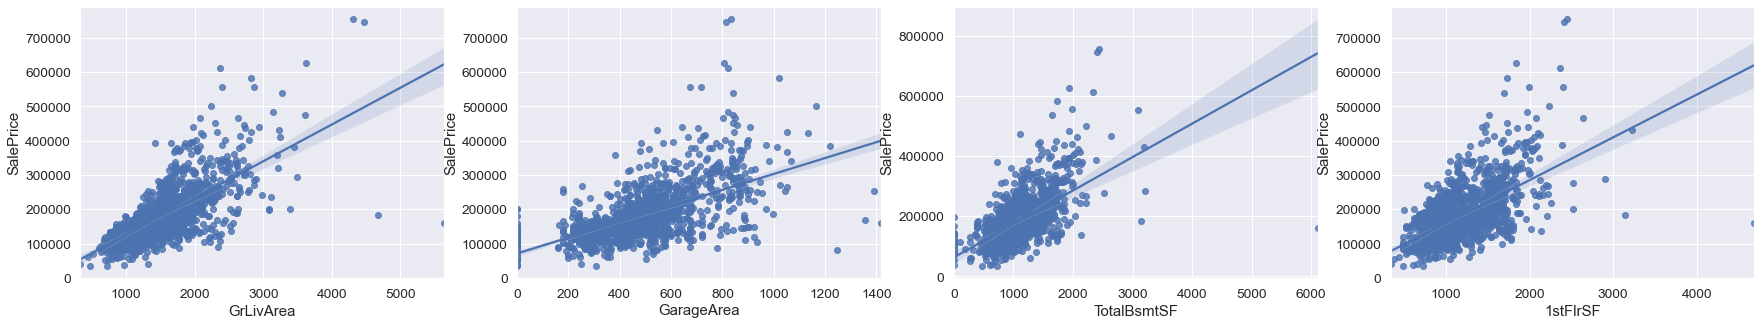

In [36]:
# see the correlation of GrLivArea and SalePrice

fig, axs = plt.subplots(ncols=4,figsize=(30, 5))
sns.regplot(x="GrLivArea", y="SalePrice", data=dataset,ax=axs[0])
sns.regplot(x="GarageArea", y="SalePrice", data=dataset,ax=axs[1])
sns.regplot(x="TotalBsmtSF", y="SalePrice", data=dataset,ax=axs[2])
sns.regplot(x="1stFlrSF", y="SalePrice", data=dataset,ax=axs[3])

<AxesSubplot:xlabel='1stFlrSF', ylabel='SalePrice'>

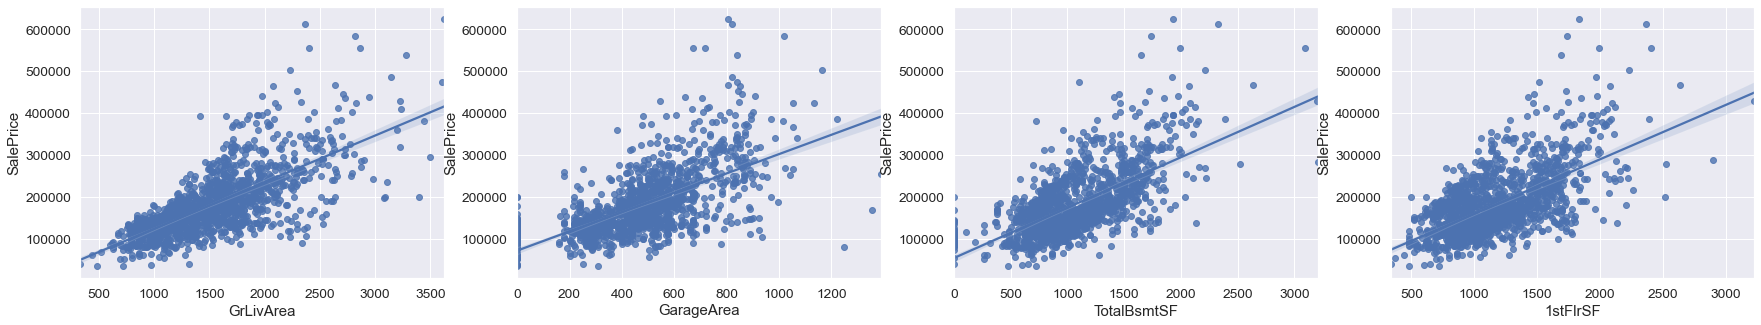

In [37]:
# because GrLivArea has datas that make graphic dirty so i decide to remove GrLivArea > 4000
dataset = dataset[dataset["GrLivArea"] < 4000]
fig, axs = plt.subplots(ncols=4,figsize=(30, 5))
sns.regplot(x="GrLivArea", y="SalePrice", data=dataset,ax=axs[0])
sns.regplot(x="GarageArea", y="SalePrice", data=dataset,ax=axs[1])
sns.regplot(x="TotalBsmtSF", y="SalePrice", data=dataset,ax=axs[2])
sns.regplot(x="1stFlrSF", y="SalePrice", data=dataset,ax=axs[3])

In [38]:
train_stats = dataset.describe()
train_stats.pop("SalePrice")
train_stats

,OverallQual,GrLivArea,GarageCars,GarageArea,TotalBsmtSF,1stFlrSF,OverallQual_1,OverallQual_2,OverallQual_3,OverallQual_4,...,OverallQual_6,OverallQual_7,OverallQual_8,OverallQual_9,OverallQual_10,GarageCars_0,GarageCars_1,GarageCars_2,GarageCars_3,GarageCars_4
count,1456.000000,1456.000000,1456.000000,1456.000000,1456.000000,1456.000000,1456.000000,1456.000000,1456.000000,1456.000000,...,1456.000000,1456.000000,1456.000000,1456.000000,1456.000000,1456.000000,1456.000000,1456.000000,1456.000000,1456.000000
mean,6.088599,1506.502060,1.764423,471.568681,1050.658654,1157.108516,0.001374,0.002060,0.013736,0.079670,...,0.256868,0.219093,0.115385,0.029533,0.009615,0.055632,0.253434,0.565247,0.122253,0.003434
std,1.369669,496.815378,0.746215,211.986421,412.155715,369.307331,0.037050,0.045361,0.116434,0.270875,...,0.437056,0.413774,0.319595,0.169353,0.097619,0.229288,0.435127,0.495895,0.327690,0.058520
min,1.000000,334.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,5.000000,1128.000000,1.000000,329.500000,795.000000,882.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,6.000000,1458.500000,2.000000,478.500000,990.500000,1086.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
75%,7.000000,1775.250000,2.000000,576.000000,1293.750000,1389.250000,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000
max,10.000000,3627.000000,4.000000,1390.000000,3206.000000,3228.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# Build Model

In [39]:
# split cleaned data into train and test
train_dataset = dataset.sample(frac=0.8,random_state=0)
test_dataset = dataset.drop(train_dataset.index)

# split data from data and labels
train_labels = train_dataset.pop('SalePrice')
test_labels = test_dataset.pop('SalePrice')

In [40]:
def build_model():
    model = keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=[len(train_dataset.keys())]),
    layers.Dense(64, activation='relu'),
    layers.Dense(1)
  ])

    optimizer = tf.keras.optimizers.RMSprop(0.001)
    model.compile(loss='mse',
                optimizer=optimizer,
                metrics=['mae', 'mse'])
    return model

model = build_model()

In [41]:
EPOCHS = 1000

history = model.fit(
  train_dataset, train_labels,
  epochs=EPOCHS, validation_split = 0.2, verbose=0,
  callbacks=[tfdocs.modeling.EpochDots()])


Epoch: 0, loss:38525214720.0000,  mae:179838.6719,  mse:38525214720.0000,  val_loss:35700334592.0000,  val_mae:175030.3750,  val_mse:35700334592.0000,  
....................................................................................................
Epoch: 100, loss:1750470016.0000,  mae:29493.0918,  mse:1750470016.0000,  val_loss:1693606528.0000,  val_mae:26159.1523,  val_mse:1693606528.0000,  
....................................................................................................
Epoch: 200, loss:1673398016.0000,  mae:28929.4766,  mse:1673398016.0000,  val_loss:1666850816.0000,  val_mae:26716.2207,  val_mse:1666850816.0000,  
....................................................................................................
Epoch: 300, loss:1584109696.0000,  mae:27980.7734,  mse:1584109696.0000,  val_loss:1631287040.0000,  val_mae:25955.1250,  val_mse:1631287040.0000,  
................................................................................................

Text(0, 0.5, 'MAE [SalePrice]')

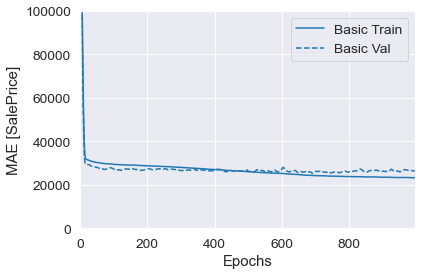

In [42]:
plotter = tfdocs.plots.HistoryPlotter(smoothing_std=2)

plotter.plot({'Basic': history}, metric = "mae")
plt.ylim([0, 100000])
plt.ylabel('MAE [SalePrice]')

# EDA v.2

In [43]:
"""
Because we get big value of MAE. we can try create one hot encoding for :
GrLivArea
GarageArea
TotalBsmtSF
1stFlrSF
SalePrice
"""
dataset["GrLivArea"] = pd.cut(dataset["GrLivArea"],[0,3000,5000,7000],labels=["small","medium","large"])
dataset["GarageArea"] = pd.cut(dataset["GarageArea"],[0,400,800,1200,1600],labels=["small","medium","large","extra large"])
dataset["TotalBsmtSF"] = pd.cut(dataset["TotalBsmtSF"],[0,1000,2000,3000],labels=["small","medium","large"])
dataset["1stFlrSF"] = pd.cut(dataset["1stFlrSF"],[0,1000,2000,3000],labels=["small","medium","large"])


In [45]:
for col in ["GrLivArea","GarageArea","TotalBsmtSF","1stFlrSF"]:
    dataset = pd.concat([dataset,pd.get_dummies(dataset[col], prefix=col)],axis=1)

In [53]:
dataset.drop(columns=["GrLivArea","GarageArea","TotalBsmtSF","1stFlrSF","OverallQual","GarageCars"],inplace=True)

# Train Model V.2

In [57]:
# split cleaned data into train and test
train_dataset = dataset.sample(frac=0.8,random_state=0)
test_dataset = dataset.drop(train_dataset.index)

# split data from data and labels
train_labels = train_dataset.pop('SalePrice')
test_labels = test_dataset.pop('SalePrice')

In [59]:
model = build_model()

EPOCHS = 1000

history = model.fit(
  train_dataset, train_labels,
  epochs=EPOCHS, validation_split = 0.2, verbose=0,
  callbacks=[tfdocs.modeling.EpochDots()])

# still ger big value of mae


Epoch: 0, loss:39320461312.0000,  mae:181833.2500,  mse:39320461312.0000,  val_loss:37304725504.0000,  val_mae:179195.9688,  val_mse:37304725504.0000,  
....................................................................................................
Epoch: 100, loss:3639604736.0000,  mae:42318.6250,  mse:3639604736.0000,  val_loss:3210752000.0000,  val_mae:39128.7500,  val_mse:3210752000.0000,  
....................................................................................................
Epoch: 200, loss:1650961536.0000,  mae:28532.9863,  mse:1650961536.0000,  val_loss:2074359680.0000,  val_mae:31052.3457,  val_mse:2074359680.0000,  
....................................................................................................
Epoch: 300, loss:1421271296.0000,  mae:26986.2969,  mse:1421271296.0000,  val_loss:1813963776.0000,  val_mae:29273.0312,  val_mse:1813963776.0000,  
................................................................................................

Text(0, 0.5, 'MAE [SalePrice]')

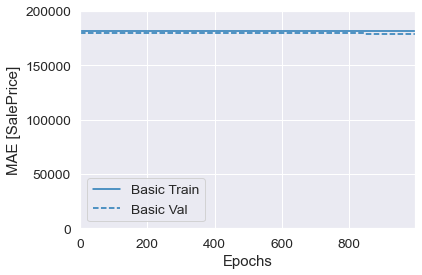

In [72]:
plotter = tfdocs.plots.HistoryPlotter(smoothing_std=2)

plotter.plot({'Basic': history}, metric = "mae")
plt.ylim([0, 200000])
plt.ylabel('MAE [SalePrice]')

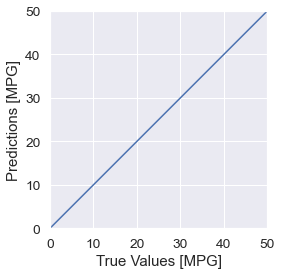

In [73]:
test_predictions = model.predict(test_dataset).flatten()

a = plt.axes(aspect='equal')
plt.scatter(test_labels, test_predictions)
plt.xlabel('True Values [MPG]')
plt.ylabel('Predictions [MPG]')
lims = [0, 50]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)